**Mounting Drive on Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Final


/content/drive/MyDrive/Final


**Reading Combined Dataset (MIT-BIH and INCART)**

In [ ]:
import pandas as  pd
df4=pd.read_csv("combined_dataset.csv")

<ipython-input-3-cc9ab9496a09>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df4=pd.read_csv("combined_dataset.csv")


In [ ]:
df4.columns

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x_data=df4.iloc[:,2:]
y_label=df4[['type']]

In [ ]:
df=df4[df4['type'].isin(['F','Q','SVEB','VEB'])]
x_data=df.iloc[:,2:]
y_label=df[['type']]


In [ ]:
y_label.value_counts()

type
VEB     36946
SVEB    16931
F        1045
Q         100
dtype: int64

**Oversampling**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform the data to perform oversampling
X_oversampled, y_oversampled = smote.fit_resample(x_data, y_label)

# Now, X_oversampled and y_oversampled contain the oversampled dataset with the desired number of samples for each class


In [ ]:
print(y_oversampled['type'].value_counts())

Q       36946
SVEB    36946
VEB     36946
F       36946
Name: type, dtype: int64


In [ ]:
df2=df4[df4['type'].isin(['N'])]
X_oversampled=pd.concat([X_oversampled,pd.DataFrame(df2.iloc[:,2:])],axis=0)
y_oversampled=pd.concat([y_oversampled,pd.DataFrame(df2['type'])],axis=0)

In [ ]:
for column in X_oversampled.columns:
    X_oversampled[column] = X_oversampled[column].astype(float)

In [ ]:
y_oversampled['type'].value_counts()

N       405824
Q        36946
SVEB     36946
VEB      36946
F        36946
Name: type, dtype: int64

In [ ]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler
target_samples=36946
sampling_strategy = {'N': target_samples,'F': target_samples,'VEB': target_samples,'SVEB': target_samples,'Q': target_samples}  # Adjust class indices as needed
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

In [ ]:
X_resampled, y_resampled = undersampler.fit_resample(X_oversampled,y_oversampled)

In [ ]:
y_resampled['type'].value_counts()

F       36946
N       36946
Q       36946
SVEB    36946
VEB     36946
Name: type, dtype: int64

**Splitting the dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.3, random_state=101)

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

**Random Forest Model**

In [ ]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier

from sklearn import metrics
model = RandomForestClassifier(random_state=101, n_estimators=150,max_depth=12)
model.fit(X_train_scaled, y_train)

# training accuracy
print('Accuracy for the train data', model.score(X_train_scaled, y_train))


y_pred = model.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("*** Confusion Matrix ***")
print(metrics.confusion_matrix(y_test, y_pred))

<ipython-input-20-e61fc98144c7>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled, y_train)


Accuracy for the train data 0.9633828521935489
Accuracy: 0.9540951659178261
*** Confusion Matrix ***
[[10784   277     0    34    52]
 [   75 10519    47   322    82]
 [    1     2 11113    89     5]
 [    8   565    56 10100   141]
 [  101   147   132   408 10359]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate macro precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision * 100:.2f}%")

# Calculate macro recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Macro Recall: {recall * 100:.2f}%")


Accuracy: 95.41%
Macro Precision: 95.44%
Macro Recall: 95.39%


**K Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train_scaled, y_train)
# training accuracy
#print('Accuracy for the train data', clf.score(X_train_scaled, y_train))

from sklearn import metrics
y_pred = clf.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("*** Confusion Matrix ***")
print(metrics.confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9674118984463812
*** Confusion Matrix ***
[[11133    13     0     1     0]
 [   91 10424    40   442    48]
 [    0     0 11210     0     0]
 [   24   362    74 10330    80]
 [  206   100   112   213 10516]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate macro precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision * 100:.2f}%")

# Calculate macro recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Macro Recall: {recall * 100:.2f}%")


Accuracy: 96.74%
Macro Precision: 96.74%
Macro Recall: 96.72%


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
#Build the model
svm = SVC(kernel="linear", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn import metrics
y_pred = svm.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,precision_recall_fscore_support

report = classification_report(y_test, y_pred, target_names=["F","Q","N","SVEB","VEB"])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           F       0.93      0.87      0.90     11147
           Q       0.74      0.83      0.78     11045
           N       0.83      0.87      0.85     11210
        SVEB       0.78      0.80      0.79     10870
         VEB       0.94      0.82      0.88     11147

    accuracy                           0.84     55419
   macro avg       0.84      0.84      0.84     55419
weighted avg       0.84      0.84      0.84     55419



**Ensemble Model - Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
svm = SVC(kernel='rbf', C=1, gamma=10, class_weight=None, probability=False)

model = RandomForestClassifier(random_state=101, n_estimators=150)

clf = KNeighborsClassifier(n_neighbors = 7)
ensemble_classifier = VotingClassifier(estimators=[
    ('svm', svm),
    ('knn', clf),
    ('rf', model)],
    voting='hard')

ensemble_classifier.fit(X_train_scaled, y_train)
y_pred = ensemble_classifier.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("*** Confusion Matrix ***")
print(metrics.confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 0.9776851851851852
*** Confusion Matrix ***
[[10857    20     0     1     3]
 [   48 10364    26   269    49]
 [    0     0 10858     0     0]
 [   25   224    52 10386    58]
 [  110    85    66   169 10330]]


In [ ]:
from sklearn.metrics import precision_score, recall_score
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
print(f"Macro Precision: {macro_precision}")
print(f"Macro Recall: {macro_recall}")

Macro Precision: 0.9776953841373917
Macro Recall: 0.9775951662602752


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate and print classification report
report = classification_report(y_test, y_pred, target_names=["F","Q","N","SVEB","VEB"])
print("Classification Report:")
print(report)


Confusion Matrix:
[[10857    20     0     1     3]
 [   48 10364    26   269    49]
 [    0     0 10858     0     0]
 [   25   224    52 10386    58]
 [  110    85    66   169 10330]]
Classification Report:
              precision    recall  f1-score   support

           F       0.98      1.00      0.99     10881
           Q       0.97      0.96      0.97     10756
           N       0.99      1.00      0.99     10858
        SVEB       0.96      0.97      0.96     10745
         VEB       0.99      0.96      0.97     10760

    accuracy                           0.98     54000
   macro avg       0.98      0.98      0.98     54000
weighted avg       0.98      0.98      0.98     54000



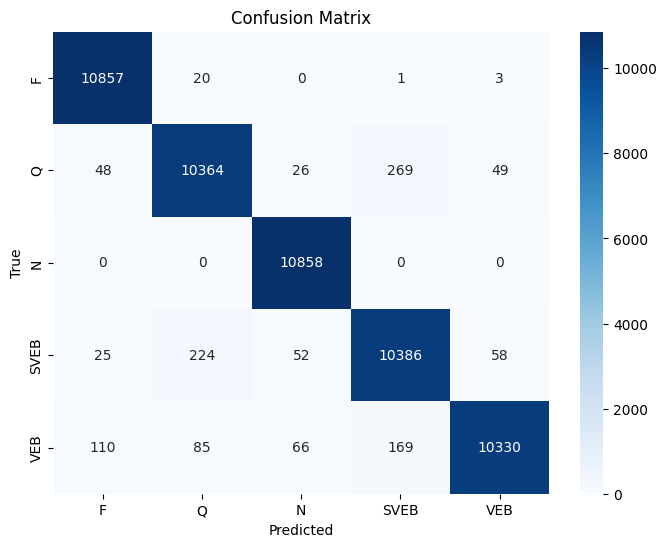

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap for the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["F","Q","N","SVEB","VEB"], yticklabels=["F","Q","N","SVEB","VEB"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()